In [11]:
import numpy as np

In [12]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:\\Users\\Abhishek\\Downloads\\Cancer Data12A\\Cancer Data12A.csv')

# Cleaning the dataset
data.drop(columns=['TBD'], inplace=True)
data.dropna(subset=['Patent_or_Publication_ID', 'Grant_or_Publication_Date'], inplace=True)

data['Family_ID'].fillna(-1, inplace=True)

text_columns = data.select_dtypes(include='object').columns
data[text_columns] = data[text_columns].fillna('Unknown')

numeric_columns = data.select_dtypes(include='number').columns
data[numeric_columns] = data[numeric_columns].fillna(0)

data['Filing_Date'] = pd.to_datetime(data['Filing_Date'], format='%Y%m%d', errors='coerce')
data['Grant_or_Publication_Date'] = pd.to_datetime(data['Grant_or_Publication_Date'], format='%Y%m%d', errors='coerce')
data['FDA_Approval_Date'] = pd.to_datetime(data['FDA_Approval_Date'], errors='coerce')

data.drop_duplicates(inplace=True)

cleaned_df_info = data.info()
cleaned_df_head = data.head()

cleaned_df_info, cleaned_df_head


<class 'pandas.core.frame.DataFrame'>
Int64Index: 269353 entries, 0 to 269352
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Family_ID                         269353 non-null  float64       
 1   Patent_or_Publication_ID          269353 non-null  object        
 2   Application_Number                269353 non-null  object        
 3   Filing_Date                       269042 non-null  datetime64[ns]
 4   Grant_or_Publication_Date         269353 non-null  datetime64[ns]
 5   CPC_Inventive                     269353 non-null  object        
 6   CPC_Additional                    269353 non-null  object        
 7   IPC_Primary                       269353 non-null  object        
 8   IPC_Secondary                     269353 non-null  object        
 9   USPC_Current_Original             269353 non-null  object        
 10  USPC_Current_Cross_Reference    

(None,
    Family_ID Patent_or_Publication_ID Application_Number Filing_Date  \
 0  1341416.0             US 6001998 A          08/836213  1997-10-27   
 1  1341416.0            US 6187568 B1          09/378062  1999-08-20   
 2  3062993.0             US 0994660 A            Unknown         NaT   
 3  3219608.0             US 1151536 A            Unknown         NaT   
 4  3458677.0             US 3275633 A            Unknown         NaT   
 
   Grant_or_Publication_Date            CPC_Inventive CPC_Additional  \
 0                1999-12-14   C12P17/188; C07D498/18        Unknown   
 1                2001-02-13   C07D498/18; C12P17/188        Unknown   
 2                1911-06-06                A61K39/00    Y10S435/931   
 3                1915-08-24  C07K16/18; G01N33/57492        Unknown   
 4                1966-09-27               C07D401/04        Unknown   
 
   IPC_Primary                                      IPC_Secondary  \
 0     Unknown  A61K35/00; A61K31/40; A61K31/445; 

In [6]:
print(data.tail())

        Family_ID Patent_or_Publication_ID Application_Number  Filing_Date  \
269348        NaN             US RE45907 E          14/180238   20140213.0   
269349        NaN             US RE45916 E          14/732721   20150606.0   
269350        NaN             US RE45968 E          13/831258   20130314.0   
269351        NaN             US RE46024 E          14/788921   20150701.0   
269352        NaN             US RE46063 E          14/561461   20141205.0   

        Grant_or_Publication_Date CPC_Inventive CPC_Additional IPC_Primary  \
269348                   20160301           NaN            NaN   A01N57/00   
269349                   20160308           NaN            NaN    A61B5/00   
269350                   20160412           NaN            NaN   C07H21/04   
269351                   20160607           NaN            NaN  C07D237/14   
269352                   20160712           NaN            NaN   A61B18/18   

                                            IPC_Secondary  \
2

In [8]:
print(data.describe())
data = data.drop(columns=['TBD'])  
data.fillna(0, inplace=True) 

numeric_summary = data.describe()

correlation_matrix = data.corr()

          Family_ID   Filing_Date  Grant_or_Publication_Date  \
count  2.684790e+05  2.690420e+05               2.693530e+05   
mean   3.133986e+09  2.005544e+07               2.007645e+07   
std    5.557303e+10  6.640089e+04               6.589426e+04   
min    1.341416e+06  1.963102e+07               1.911061e+07   
25%    2.624587e+07  2.002083e+07               2.004060e+07   
50%    3.496394e+07  2.006102e+07               2.009050e+07   
75%    4.111263e+07  2.010112e+07               2.013011e+07   
max    1.000000e+12  2.016041e+07               2.016080e+07   

       Drugs_and_Chemistry  Diagnostic_and_Surgical_Devices  \
count        269353.000000                    269353.000000   
mean              0.761154                         0.271217   
std               0.426380                         0.444588   
min               0.000000                         0.000000   
25%               1.000000                         0.000000   
50%               1.000000                   

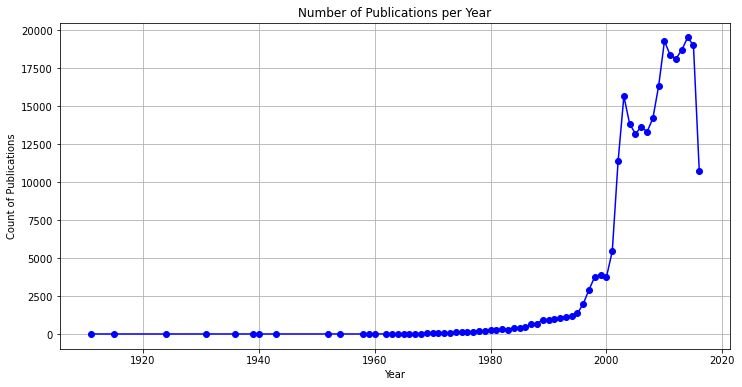

In [8]:
# Visualization
# Plotting the trend of `Grant_or_Publication_Date` over time
data['Grant_or_Publication_Date'] = pd.to_datetime(data['Grant_or_Publication_Date'], format='%Y%m%d', errors='coerce')
data['year'] = data['Grant_or_Publication_Date'].dt.year
yearly_counts = data.groupby('year').size()

plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='b')
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Count of Publications")
plt.grid(True)
plt.show()

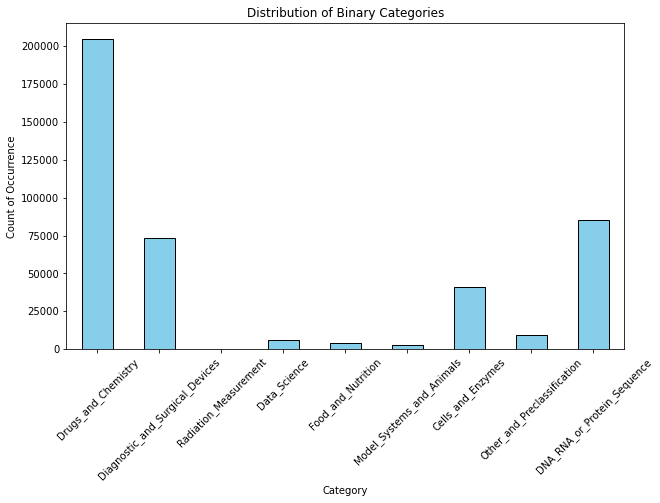

In [9]:
# Bar chart for binary features to see distribution
binary_features = ['Drugs_and_Chemistry', 'Diagnostic_and_Surgical_Devices', 'Radiation_Measurement', 
                   'Data_Science', 'Food_and_Nutrition', 'Model_Systems_and_Animals', 
                   'Cells_and_Enzymes', 'Other_and_Preclassification', 'DNA_RNA_or_Protein_Sequence']

binary_counts = data[binary_features].sum()

plt.figure(figsize=(10, 6))
binary_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Binary Categories")
plt.xlabel("Category")
plt.ylabel("Count of Occurrence")
plt.xticks(rotation=45)
plt.show()

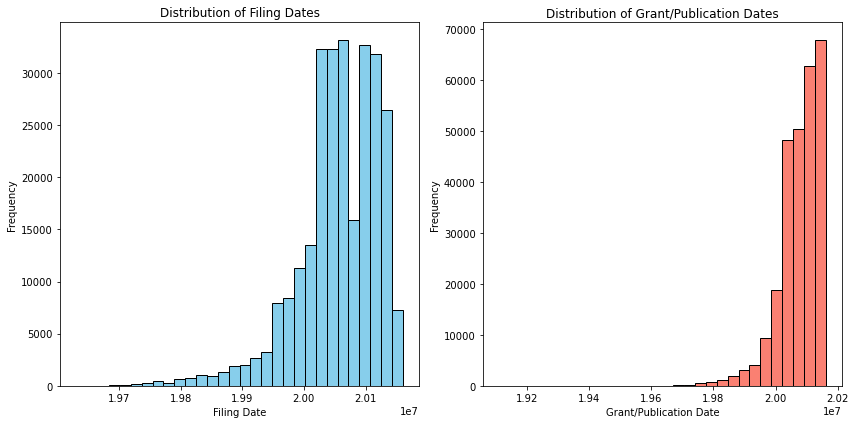

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data['Filing_Date'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Filing Dates')
plt.xlabel('Filing Date')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(data['Grant_or_Publication_Date'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Grant/Publication Dates')
plt.xlabel('Grant/Publication Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<AxesSubplot:title={'center':'Top 5 Filing_Date'}, ylabel='Filing_Date'>

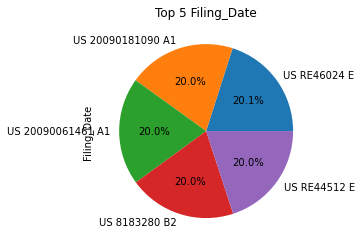

In [11]:
data.groupby('Patent_or_Publication_ID')['Filing_Date'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Filing_Date')